<a href="https://colab.research.google.com/github/SofyaK12/neural_network/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

effectivity =  0.7
9


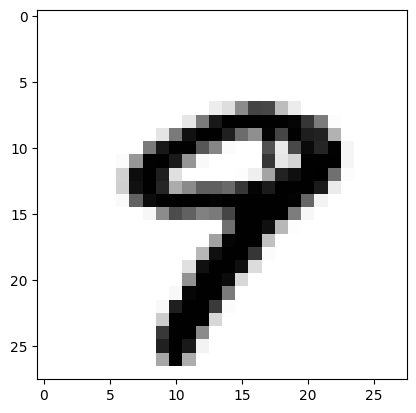

In [ ]:
import numpy
# библиотека scipy.special содержит сигмоиду expit()
import scipy.special
import matplotlib.pyplot

# определение класса нейронной сети
class neuralNetwork:

    # инициализация нейронной сети
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задание количества узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # матрицы весовых коэффициентов связей wih и who
        # весовые коэффициенты связей между узлом i и узлом j следующего слоя обозначены как w_i_j:
        # w11 w21
        # w12 w22 и т.д.
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # коэффициент обучения
        self.lr = learningrate

        # сигмоида в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразование списка входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # расчёт входящих сигналов для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # расчёт исходящих сигналов для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # расчёт входящих сигналов для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # расчёт исходящих сигналов для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        # ошибки выходного слоя = (целевое значение - фактическое)
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределённые пропорционально весовым коэффициентам связей и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # обновление веса для связей между скрытым и выходным слоями
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))

        # обновление веса для связей между скрытым и выходным слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))

        pass

        # опрос нейронной сети
    def query(self, inputs_list):
        # преобразование списка входных значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        # расчёт входящих сигналов для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # расчёт исходящих сигналов для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # расчёт исходящих сигналов для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # расчёт исходящих сигналов для выходного слоя
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

    # количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# коэффициент обучения
learning_rate = 0.1

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# загрузка в список тренировочного набора данных CSV-файла набора MNIST
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# тренировка нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети
epochs = 10

for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создание целевые входные значения (все равны 0,01, за
        # исключением желаемого маркерного значения, равного 0,99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# загрузить в список тестовый набор данных
# CSV-файла набора MNIST
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# тестирование нейронной сети

#журнал оценок работы сети, первоначально пустой
scorecard = []

# перебор всех записей в тестовом наборе данных
for record in test_data_list:
    # получение списка значений из записи, используя символы
    # запятой (',') в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    #  масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label):
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecard.append(0)
        pass
    pass

# расчёт показателей эффективности в виде
# доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print('effectivity = ', scorecard_array.sum() /
      scorecard_array.size)
print(all_values[0])
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')